In [ ]:
import sys, subprocess, pkgutil

def ensure(pkg):
  if pkg not in {m.name for m in pkgutil.iter_modules()}:
    subprocess.run([sys.executable, "-m", "pip", "install", pkg, "-q"], check=True)

# Core libraries for this lab
for p in ["numpy", "pandas", "matplotlib", "seaborn"]:
  ensure(p)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set_theme(context="notebook", style="whitegrid")

In [ ]:
from google.colab import files
up = files.upload()
import io
df_all = pd.read_csv(io.BytesIO(up['Au_nanoparticle_dataset.csv']))
df_all.head()

Saving Au_nanoparticle_dataset.csv to Au_nanoparticle_dataset.csv


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
""" 1. Create a new dataframe by filtering all the columns [i.e., features] except N_total, N_bulk,
N_surface and R_avg columns."""

features  = ["N_total", "N_bulk", "N_surface", "R_avg"]

# Quick check that all exist
missing = [c for c in features if c not in df_all.columns]

if missing:
  print("Missing columns:", missing)

new_df = df_all[features].copy()
new_df.head()

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


In [ ]:
# 2. Display the first 20 samples of this dataframe.
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
# 3. Calculate the mean, standard deviation and quartile values for each of the above 4 features.
stats = pd.DataFrame({
    "mean": new_df.mean(),
    "std": new_df.std(),
    "Q1 (25%)": new_df.quantile(0.25),
    "Median (50%)": new_df.quantile(0.50),
    "Q3 (75%)": new_df.quantile(0.75),
})

stats

,mean,std,Q1 (25%),Median (50%),Q3 (75%)
N_total,3476.786500,3679.286769,1061.000000,1867.00000,4503.000000
N_bulk,2521.550250,2976.232459,618.750000,1199.00000,3183.000000
N_surface,955.236250,721.870220,437.000000,666.00000,1301.750000
R_avg,20.654363,7.610716,15.160725,18.62925,25.525125


In [ ]:
# Describe summary
summary = new_df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
N_total,4000.0,3476.786500,3679.286769,236.0000,1061.000000,1867.00000,4503.000000,14277.0000
N_bulk,4000.0,2521.550250,2976.232459,89.0000,618.750000,1199.00000,3183.000000,11580.0000
N_surface,4000.0,955.236250,721.870220,137.0000,437.000000,666.00000,1301.750000,3190.0000
R_avg,4000.0,20.654363,7.610716,8.5286,15.160725,18.62925,25.525125,39.2392


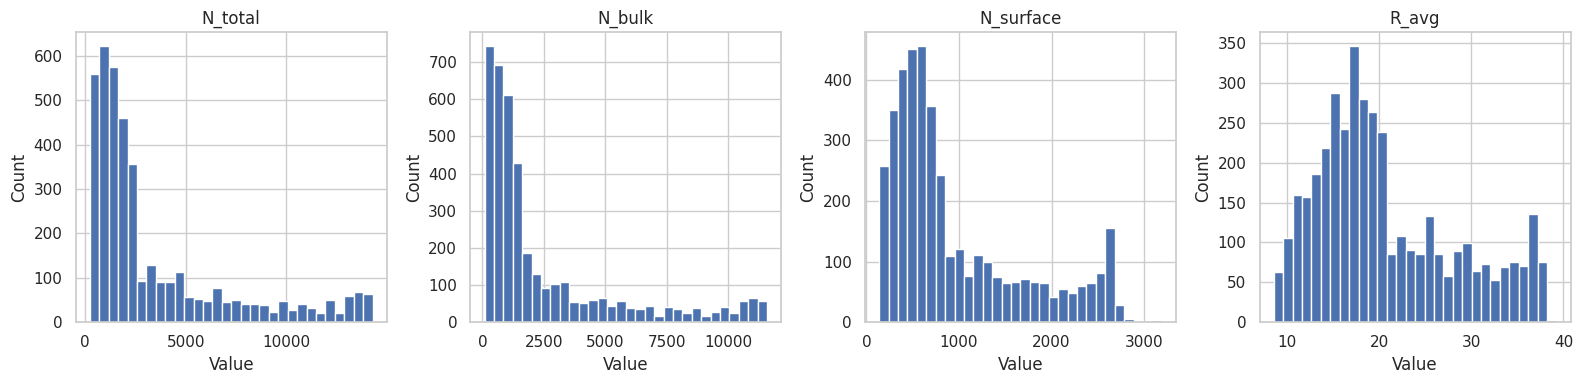

In [ ]:
# 4. Plot the histogram of each of these features in a 1x4 layout.
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for ax, col in zip(axes, features):
    ax.hist(new_df[col].dropna(), bins=30)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


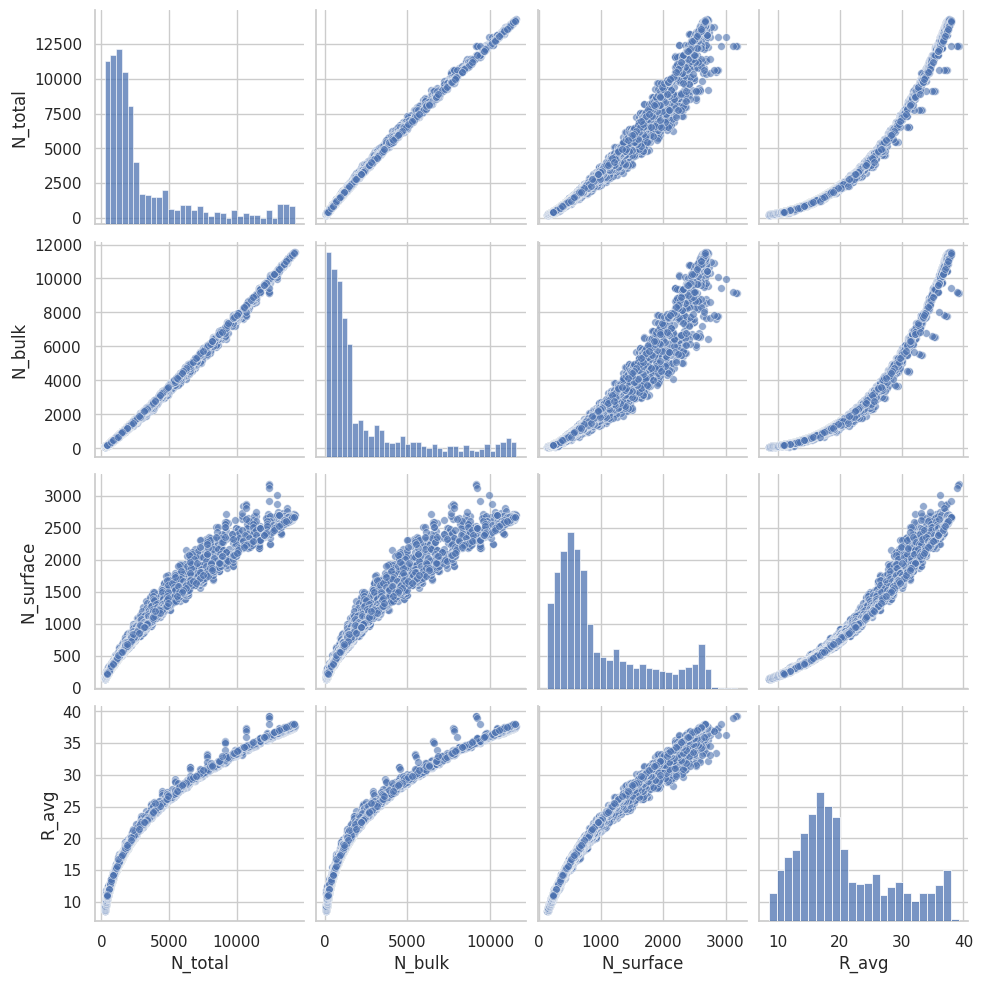

In [ ]:
""" 5. Visualize the scatter plots and histograms of this dataframe using the pairplot functionality
of seaborn library."""

sns.pairplot(new_df, diag_kind="hist", plot_kws={"alpha":0.6, "s":30})
plt.show()


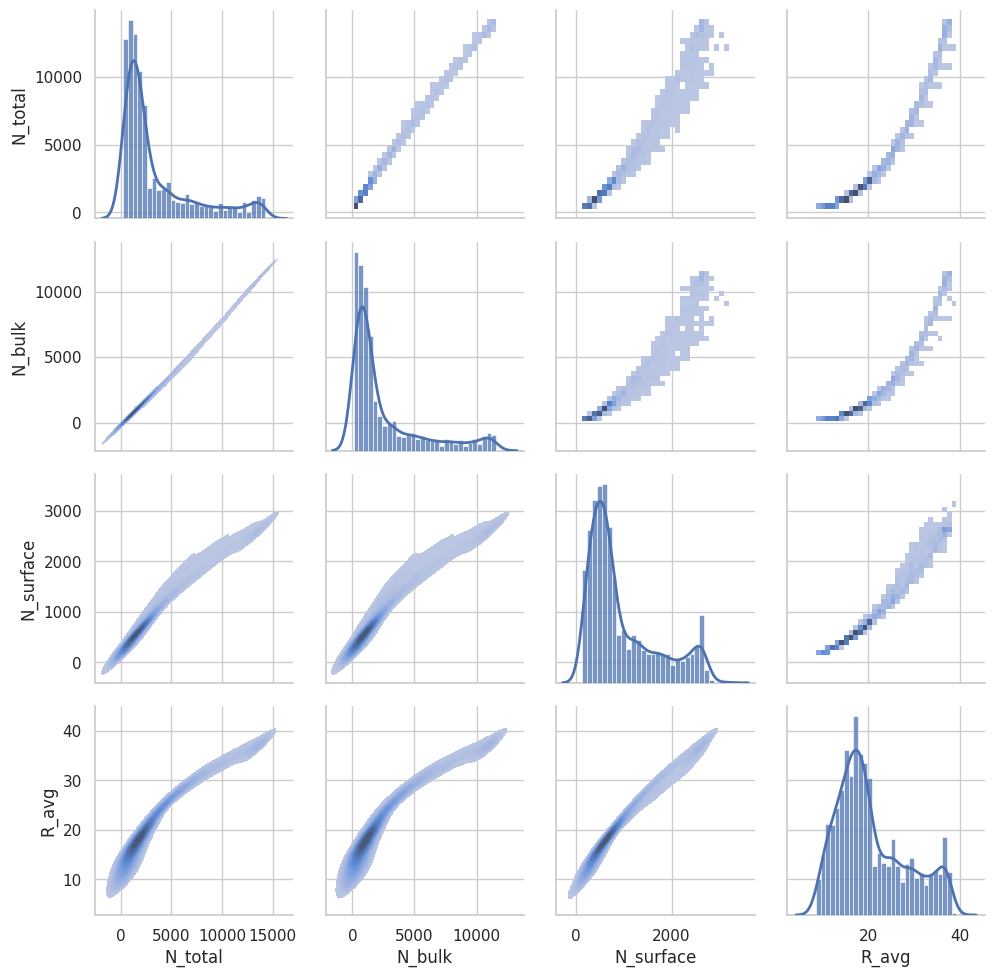

In [ ]:
""" 6. Add the below code and change it such that,
        a. Plots on the diagonal contains the histogram of each feature along with the kernal
           density estimation plot.
        b. Plots on the lower haf [g.map_lower] contains the bivariate kernal density
           estimation plot. """

g = sns.PairGrid(new_df, diag_sharey=False)

# Upper-right: bivariate histogram (2D)
g.map_upper(sns.histplot, bins=30, pmax=.9)

# Diagonal: histogram + KDE overlay
g.map_diag(sns.histplot, bins=30, stat="density")
g.map_diag(sns.kdeplot, lw=2)

# Lower-left: bivariate KDE
g.map_lower(sns.kdeplot, fill=True, thresh=0.05, levels=15)

plt.show()
